In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import os
from tqdm import tqdm

graph_file_name = 'full_graph.gexf'
attrs_file_name = os.path.join('twitch_gamers', 'large_twitch_features.csv')

In [3]:
G = nx.read_gexf(graph_file_name)
df_attrs = pd.read_csv(attrs_file_name)

In [4]:
print(f'Graph is connected? {nx.is_connected(G)}')
print(f'It has {len(G.nodes)} nodes and {len(G.edges)} edges.')
degrees = [ len(node) for node in G.nodes ]
print(f'Average degree: {sum(degrees) / len(G.nodes) :.3f}')

Graph is connected? True
It has 168114 nodes and 6797557 edges.
Average degree: 5.339


In [5]:
# basic analysis
node_data = dict(G.nodes(data=True))
cat_attrs_names = ['mature', 'dead_account', 'language', 'affiliate']
other_attrs = ['life_time', 'views']
attrs_dict = dict()
for col in cat_attrs_names:
    attrs_dict[col] = { val:0 for val in list(df_attrs[col].unique()) }
for col in other_attrs:
    attrs_dict[col] = list()

for node_name, values in node_data.items():
    for col in cat_attrs_names:
        attrs_dict[col][values[col]] += 1
    for col in other_attrs:
        attrs_dict[col].append( values[col] )

mature -> [1, 0]


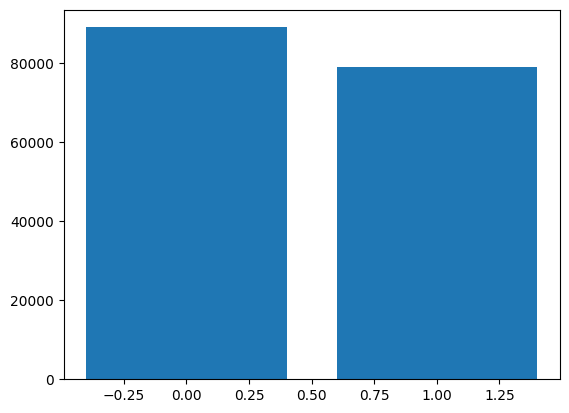

dead_account -> [0, 1]


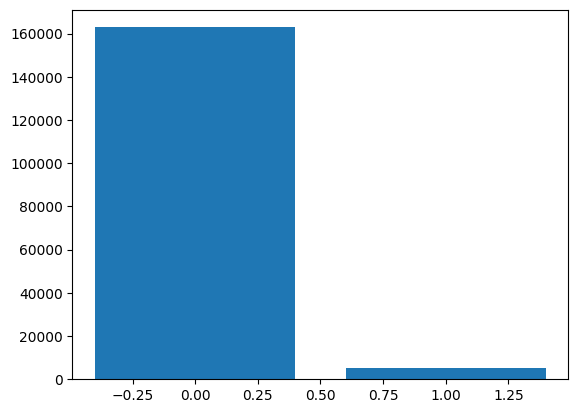

language -> ['EN', 'FR', 'KO', 'JA', 'RU', 'PL', 'DE', 'ES', 'IT', 'PT', 'OTHER', 'TR', 'ZH', 'SV', 'NL', 'TH', 'CS', 'DA', 'HU', 'FI', 'NO']


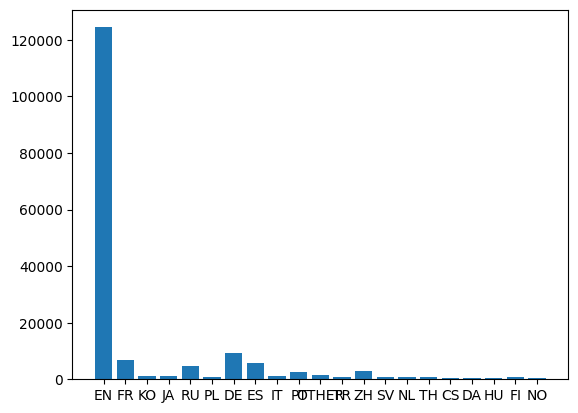

affiliate -> [1, 0]


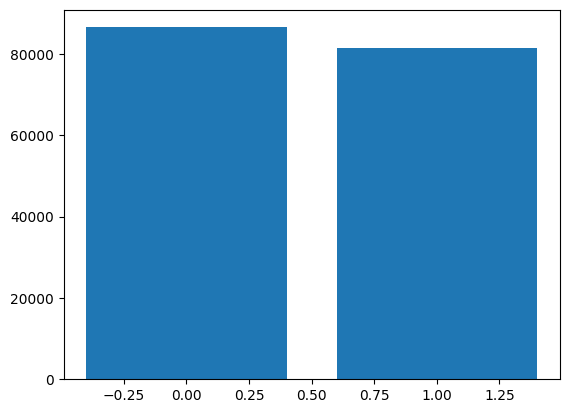

In [6]:
for col in cat_attrs_names:
    values = list(attrs_dict[col].keys())
    print(f'{col} -> {values}')
    plt.bar(values, [ attrs_dict[col][val] for val in values ])
    plt.show()

life_time


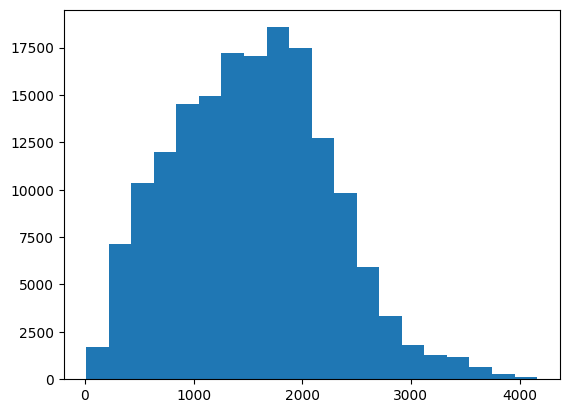

views


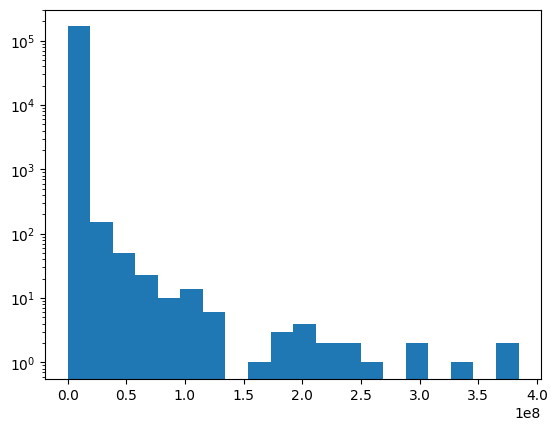

In [10]:
for col in other_attrs:
    print(col)
    plt.hist(attrs_dict[col], bins=20)
    if col == 'views':
        plt.yscale('log')
    plt.show()

{5: 90000, 6: 68114, 4: 9000, 3: 900, 2: 90, 1: 10}


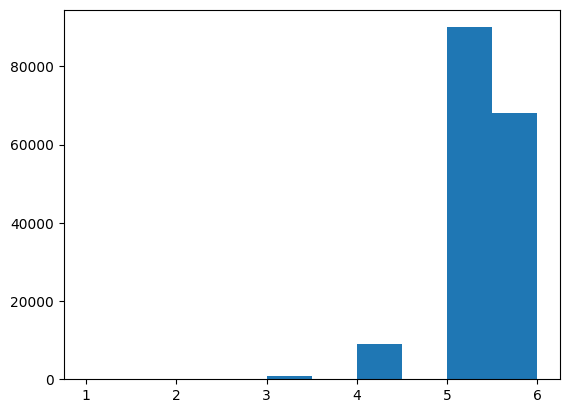

In [18]:
plt.hist(degrees, bins=10)
degs_dict = dict()
for deg in degrees:
    if deg in degs_dict:
        degs_dict[deg] += 1
    else:
        degs_dict[deg] = 1
print(degs_dict)

In [19]:
# network analysis
print(f'Between centrality: { nx.betweenness_centrality(G) }')

KeyboardInterrupt: 

In [ ]:
# compare with kaggle notebooks
# https://www.kaggle.com/code/gksriharsha/intro-to-networkx-using-twitch-network
